# Projet IA Pneumonie

### Chargement du premier Dataframe (non malade)

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
from matplotlib import image as mpimg
import skimage.transform as skimg
import math;


def load_image(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            #re = cv2.recize(img,(254,254))
            re = skimg.resize(img, (254, 254))
            images.append(re)
    tab = np.array(images)
    tab1 = tab.reshape(tab.shape[0],tab.shape[1] * tab.shape[2])
    return tab1

#test = load_image("../Ressource/sain")
#df = pd.DataFrame(test)
#df.to_hdf('trainNormal.hdf', key='df',mode='w')

In [4]:
df1 = pd.read_hdf('trainNormal.hdf',key='df')
print(df1.shape)

(1575, 64516)


### Chargement du second dataframe (malade)

In [3]:
import cv2

def load_image2(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename),cv2.IMREAD_GRAYSCALE)
        if img is not None:
            re = skimg.resize(img, (254, 254))
            images.append(re)
    tab = np.array(images)
    tab1 = tab.reshape(tab.shape[0],tab.shape[1] * tab.shape[2])
    return tab1

#test = load_image2("../Ressource/malade")
#df2 = pd.DataFrame(test)
#df2.to_hdf('trainPneumonia.hdf', key='df',mode='w')

In [5]:
df2 = pd.read_hdf('trainPneumonia.hdf',key='df')
print(df2.shape)

(3000, 64516)


In [6]:
import sklearn
#df1Normalized['label'] = 0
#df2Normalized['label'] = 1
df1['label']=0
df2['label']=1
X = pd.concat([df1,df2])
X.reset_index(inplace=True,drop=True)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,64507,64508,64509,64510,64511,64512,64513,64514,64515,label
0,4.745635e-01,0.484991,0.499945,0.504004,0.504841,0.513311,0.525147,0.534823,0.538945,0.540905,...,0.252148,0.303939,3.920109e-01,0.526666,0.697980,0.828577,0.847190,0.835010,0.646233,0
1,9.923810e-02,0.109494,0.106155,0.103974,0.104765,0.106713,0.100356,0.095201,0.095213,0.094686,...,0.148243,0.150170,1.488780e-01,0.149956,0.152289,0.157913,0.151286,0.152344,0.145834,0
2,2.199632e-07,0.000262,0.007212,0.031274,0.067897,0.105348,0.159279,0.204231,0.236606,0.268677,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,3.027003e-01,0.305875,0.319769,0.323062,0.324551,0.318564,0.319471,0.321305,0.325040,0.322997,...,0.178185,0.127743,7.326164e-02,0.043363,0.010860,0.000091,0.000000,0.000000,0.000000,0
4,5.295596e-01,0.453535,0.392269,0.381753,0.407985,0.510689,0.604765,0.642700,0.647125,0.640861,...,0.010286,0.000373,1.345112e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [7]:
X = sklearn.utils.shuffle(X)
Y = X['label']
del X['label']

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.25,random_state=0)
print(Xtrain.shape)
print(Xtest.shape)
print('Pourcentage = ',Xtrain.shape[0]/X.shape[0])

(3431, 64516)
(1144, 64516)
Pourcentage =  0.7499453551912568


# Différents modèles 

## Arbre de décision

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
tabResults = []
x = []
j=1
for i in range(1,20):
    Arbre_decision = DecisionTreeClassifier(max_depth=i)
    clf = Arbre_decision.fit(Xtrain,Ytrain)
    Ypredict = clf.predict(Xtest)
    print(i,' : ',accuracy_score(Ytest,Ypredict))
    tabResults.append(accuracy_score(Ytest,Ypredict))
    x.append(i)
    j+=1


1  :  0.784965034965035
2  :  0.8076923076923077
3  :  0.8085664335664335
4  :  0.8295454545454546
5  :  0.8601398601398601


In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,tabResults)
print(tabResults.index(max(tabResults))+1,' : ',max(tabResults))

## Plus proche voisins

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [54]:
tabResults = []
x = []
for i in range(1,20):
    KNN = KNeighborsClassifier(i)
    clf = KNN.fit(Xtrain,Ytrain)
    Ypredict = clf.predict(Xtest)
    print(i,' : ',accuracy_score(Ytest,Ypredict))
    tabResults.append(accuracy_score(Ytest,Ypredict))
    x.append(i)

1  :  0.8784965034965035
2  :  0.8898601398601399
3  :  0.8977272727272727
4  :  0.9020979020979021
5  :  0.9038461538461539
6  :  0.9082167832167832
7  :  0.9038461538461539
8  :  0.9090909090909091
9  :  0.9003496503496503
10  :  0.9082167832167832
11  :  0.9055944055944056
12  :  0.9047202797202797
13  :  0.9012237762237763
14  :  0.9047202797202797
15  :  0.8977272727272727
16  :  0.9003496503496503
17  :  0.8942307692307693
18  :  0.8951048951048951
19  :  0.8924825174825175


8  :  0.9090909090909091


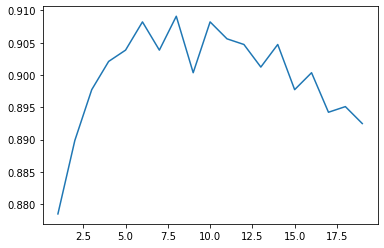

In [55]:
import matplotlib.pyplot as plt
plt.plot(x,tabResults)
print(tabResults.index(max(tabResults))+1,' : ',max(tabResults))

## SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
tabResults = []
X = []
j=1
for i in np.arange(0.1,1.1,0.1):
    clf = svm.SVC(gamma=i)
    clf.fit(Xtrain,Ytrain)
    Ypredict = clf.predict(Xtest)
    print(j,') ',i,' : ',accuracy_score(Ytest,Ypredict))
    tabResults.append(accuracy_score(Ytest,Ypredict))
    X.append(j)
    j+=1

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,tabResults)
print(tabResults.index(max(tabResults))+1,' : ',max(tabResults))

## Réseau neronal

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [15]:
tabResults = []
X = []
j=1

for i in range(3,7):
    for k in range(3,7):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=1)
        clf.fit(Xtrain, Ytrain)
        Ypredict = clf.predict(Xtest)
        print(i,', ',k,' : ',accuracy_score(Ytest,Ypredict))
        tabResults.append(accuracy_score(Ytest,Ypredict))
        X.append(j)
        j+=1

3 ,  3  :  0.6896853146853147
3 ,  4  :  0.9274475524475524
3 ,  5  :  0.6896853146853147
3 ,  6  :  0.6896853146853147
4 ,  3  :  0.9318181818181818
4 ,  4  :  0.6896853146853147


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


4 ,  5  :  0.9274475524475524
4 ,  6  :  0.9309440559440559


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 ,  3  :  0.9274475524475524


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 ,  4  :  0.9300699300699301
5 ,  5  :  0.9256993006993007
5 ,  6  :  0.9274475524475524


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


6 ,  3  :  0.9326923076923077


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


6 ,  4  :  0.9361888111888111
6 ,  5  :  0.9291958041958042
6 ,  6  :  0.9300699300699301


14  :  0.9361888111888111


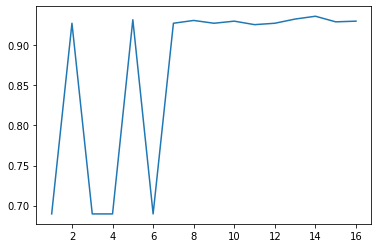

In [16]:
import matplotlib.pyplot as plt
plt.plot(X,tabResults)
print(tabResults.index(max(tabResults))+1,' : ',max(tabResults))